#
Polycystic Ovary Syndrome (PCOS) is a hormonal condition affecting 5-10% of women of reproductive age. It is characterized by symptoms such as irregular periods, excessive hair growth, and ovarian cysts, which can significantly impact a woman's health and quality of life. Early detection is crucial for timely medical intervention.

In this project, I aim to build and evaluate three machine learning models—Logistic Regression, Decision Tree Classifier, and Random Forest Classifier—to predict PCOS diagnosis (binary target: 0 for no PCOS and 1 for PCOS). These models were chosen for their suitability in binary classification tasks and their ability to provide interpretable and accurate predictions.

The project will include hyperparameter tuning to optimize the models and identify the best-performing one. I will begin by importing the necessary libraries for data preprocessing, model building, and evaluation. This project holds real-world significance, as improving PCOS detection could help affected women receive timely medical care and support. 

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

In [3]:
#Loading the PCOS data into Jupyter notebook
Data = pd.read_csv("pcos_dataset.csv")
Data.head(10)


,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
5,38,19.3,0,28.4,6,0
6,24,20.2,1,72.5,29,0
7,43,20.2,1,85.8,17,0
8,36,20.6,0,50.4,5,0
9,40,20.4,0,82.0,21,0


In [5]:
print(f"{Data.columns}")   # Confirming the columns contained in my dataset

Index(['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count', 'PCOS_Diagnosis'],
      dtype='object')


In [7]:
# Are there any missing values?
Data.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [9]:
print(Data.info()) # Investigating the data type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB
None


In [11]:
Data.describe()  # Return summary statistics of numerical columnms 

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [17]:
#Splitting the data into the target and Explanatory Variables
X = Data[["Age","BMI","Menstrual_Irregularity","Testosterone_Level(ng/dL)","Antral_Follicle_Count"]]
y = Data["PCOS_Diagnosis"]

In [19]:
# The number of rows and columns contained in the dataset
Data.shape

(1000, 6)

<Axes: xlabel='PCOS_Diagnosis', ylabel='count'>

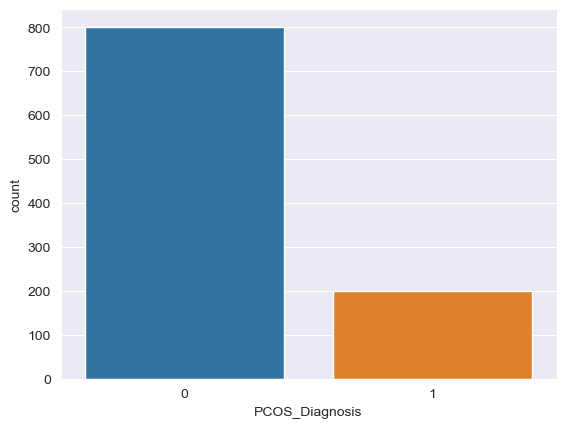

In [21]:
# The distribtuion of the target variable, PCOS_diagnosis
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(x = "PCOS_Diagnosis", data= Data)

#
According to the data, most patients have PCOS as compared to people who do not have PCOS. 

<Axes: >

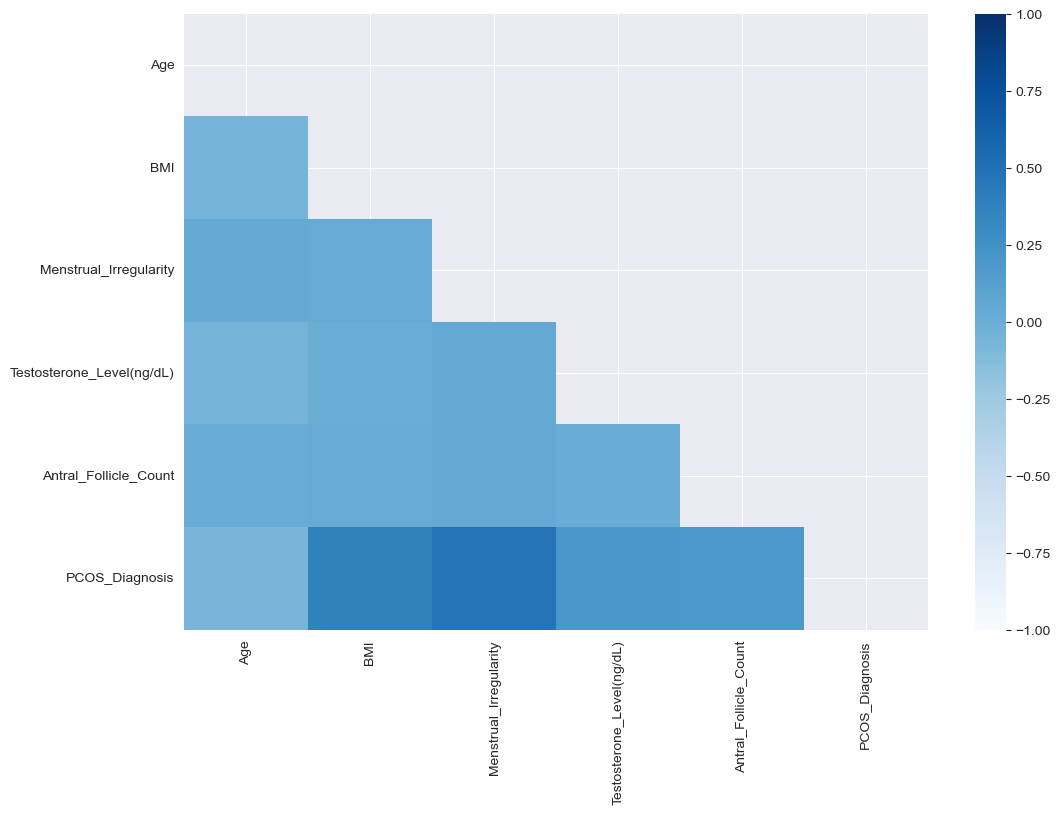

In [23]:
#Getting the correlation matrix and visualizing it using a heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
mask =  np.triu(np.ones_like(Data.corr()))
sns.heatmap(Data.corr(), vmin = -1, vmax = 1, cmap = "Blues", mask = mask)

Text(0.5, 1.0, 'Features Correlating with having PCOS')

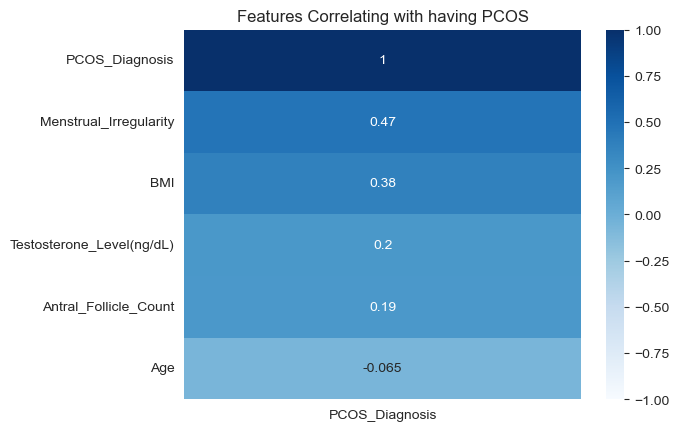

In [25]:
# Modifying the heatmap to plot correlation between variables in the dataset and PCOS_dignosis
heatmap = sns.heatmap(Data.corr()[["PCOS_Diagnosis"]].sort_values(by = "PCOS_Diagnosis", ascending =False), vmin = -1, vmax = 1, cmap = "Blues", annot = True)
heatmap.set_title("Features Correlating with having PCOS")


In [27]:
#Standardizing/ Normalizing the Explanatory variables
#create a scaler
scaler = StandardScaler()
scaler.fit_transform(X)


array([[-0.91864162,  1.68515712,  0.94169658, -1.51021956,  0.35820607],
       [ 0.61814142,  0.00263528, -1.06191317, -0.1321677 ,  1.0658435 ],
       [ 0.02707102, -0.56496246, -1.06191317,  1.40572089,  1.49042596],
       ...,
       [ 0.61814142,  0.38779088, -1.06191317, -1.19918591,  1.49042596],
       [ 1.09099774,  0.1850774 , -1.06191317,  1.53099833, -1.19859628],
       [-1.15506978, -0.90957537,  0.94169658,  0.80957307, -1.48165126]])

In [29]:
# splitting the data in testing and training sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [31]:
#Fitting and training the model
logistic_model  = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Making Predictions using the model
predictions = logistic_model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0], dtype=int64)

In [35]:
#Evaluating the model: Method 1  
score = accuracy_score(predictions,y_test)
score

0.895

# 
The accuracy score represents the proportion of correct predictions made by the logistic regression model that I have trained on my dataset.
The accuracy score of my model is 89.6% which shows that the model is performing well, that is the model correctly classifies 89.5% of test samples . 

In [37]:
#Evaluating the model: Method 2
list_p = ["Without PCOS", "With PCOS"]
print(classification_report(y_test,predictions, target_names=list_p))


              precision    recall  f1-score   support

Without PCOS       0.93      0.94      0.94       162
   With PCOS       0.74      0.68      0.71        38

    accuracy                           0.90       200
   macro avg       0.84      0.81      0.82       200
weighted avg       0.89      0.90      0.89       200



# Interpretation of Precision, recall, F1-score and support   
Precision: 93% of predicted non-PCOS cases are correct while 74% of predicted PCOS cases are correct.

Recall: 94% of the actual non-PCOS cases are identified while only 68% of actual PCOS cases are identified.

F1-score:The score of 94% shows that the model is strong for non-PCOS detection but may under-identify PCOS cases(71%) .  
  

In [39]:
# Method 3: confusion matrix
matrix = confusion_matrix(y_test,predictions)
matrix

array([[153,   9],
       [ 12,  26]], dtype=int64)

#
The confusion matrix is returned inform of an array. Note The the diagonal element of the array, 153 and 26, represents the actual predictions.
The remaining non-diagonal elements represent inaccurate preditions.

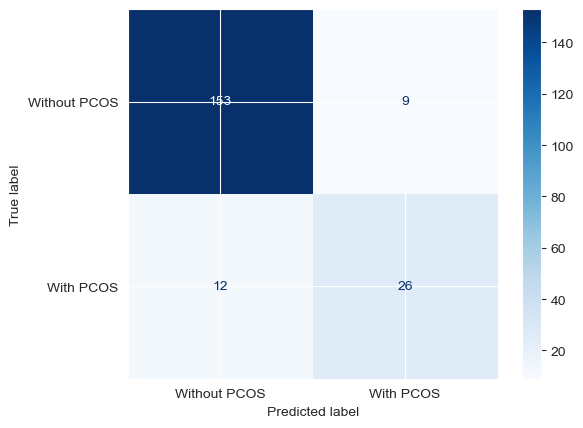

In [41]:
#Displaying the confusion matrix 
import matplotlib.pyplot as plt
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = list_p)
display.plot(cmap=plt.cm.Blues)
plt.show()

# The ROC curve
The receiver operating characterics curve is a plot of true positive rate against the false positive rate. It shows a trade-off between sensitivity and specificity.


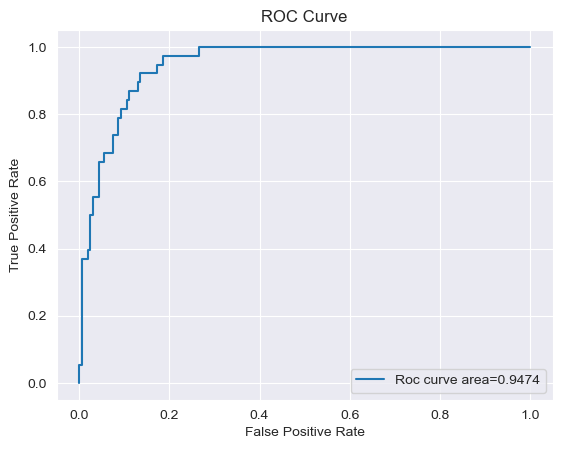

In [43]:
# Plotting the ROC curve
from sklearn.metrics  import roc_curve, roc_auc_score
import seaborn as sns
sns.set_style("darkgrid")
y_pred_proba = logistic_model.predict_proba(X_test)[:,1]  # Extracts the probalities for the possitive class.  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Calculates fpr and tpr for different probability thresholds.

auc = roc_auc_score(y_test, y_pred_proba)  # Calculates the area under the ROC curve for the predicted probabilities and true labels.
plt.plot(fpr, tpr, label=f"Roc curve area={auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

# Interpreting the ROC value
The auc, which is  0.947, is closer to 1. This shows excellent performance on the model's part, and that the model has strong ability to distinguish between the cases.  

In [45]:
coef = abs(logistic_model.coef_[0]) # The coeffients represent the impact of each feature on the probability of positive class

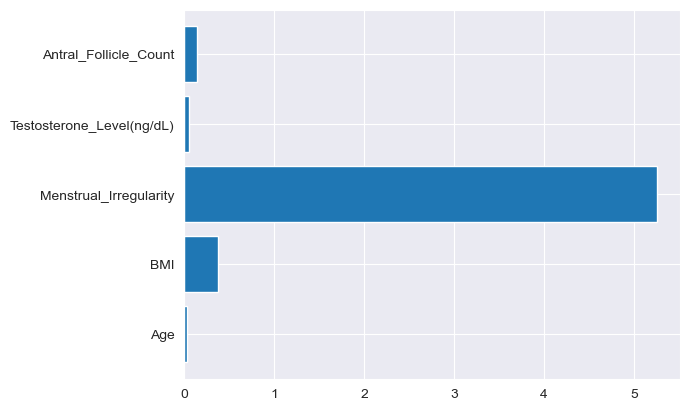

In [47]:
# feature importance
plt.barh(X.columns, coef)
plt.show()

#
The graph above shows that menstual irregularity is the most important feature while Age is the least important.

# Fitting a decision tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 


In [51]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [55]:
pred_pcos = model.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, pred_pcos)
accuracy

0.995

In [61]:
#Evaluating the model: Method 2
list_p = ["Without PCOS", "With PCOS"]
print(classification_report(y_test,pred_pcos, target_names=list_p))

              precision    recall  f1-score   support

Without PCOS       0.99      1.00      1.00       162
   With PCOS       1.00      0.97      0.99        38

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [63]:
# Method 3: confusion matrix
matrix1 = confusion_matrix(y_test,pred_pcos)
matrix1

array([[162,   0],
       [  1,  37]], dtype=int64)

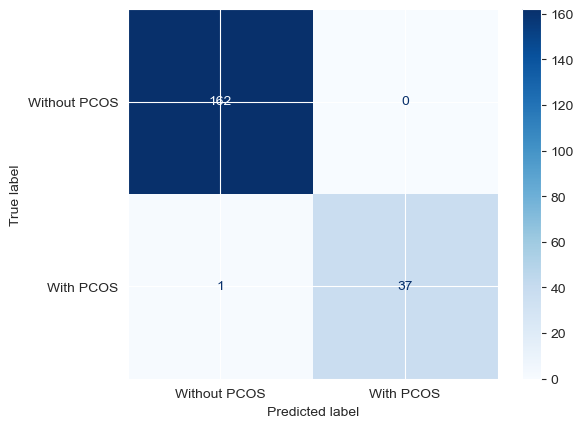

In [65]:
#Displaying the confusion matrix 
import matplotlib.pyplot as plt
display = ConfusionMatrixDisplay(confusion_matrix = matrix1, display_labels = list_p)
display.plot(cmap=plt.cm.Blues)
plt.show()

#### Fitting a Random Forest Classifier


In [109]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [111]:
#making predictions with the trained model
clf_pred = clf.predict(X_test)

In [113]:
accuracy1 = accuracy_score(y_test, clf_pred)
accuracy1

0.995

In [115]:
#Evaluating the model: Method 2
list_p = ["Without PCOS", "With PCOS"]
print(classification_report(y_test,clf_pred, target_names=list_p))

              precision    recall  f1-score   support

Without PCOS       0.99      1.00      1.00       162
   With PCOS       1.00      0.97      0.99        38

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [117]:
# Method 3: confusion matrix
matrix2 = confusion_matrix(y_test,clf_pred)
matrix2

array([[162,   0],
       [  1,  37]], dtype=int64)

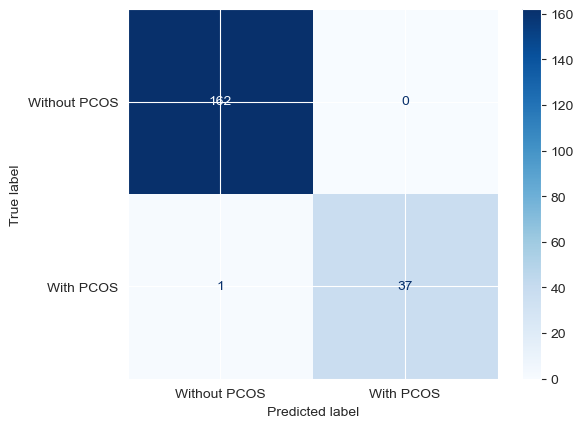

In [119]:
#Displaying the confusion matrix 
import matplotlib.pyplot as plt
display = ConfusionMatrixDisplay(confusion_matrix = matrix2, display_labels = list_p)
display.plot(cmap=plt.cm.Blues)
plt.show()

# 
Before Hyperparemeter tuning, out of the 3, Random forest and Decision tree classifier seems to be the best models for predicting if a female patient has pcos or not. 

# Performing Hyperparameter tuning on the 3 models

In [138]:
from sklearn.model_selection import GridSearchCV

# Defining Model parameters
model_params = {
    "logistic_model": {
        "model": LogisticRegression(solver="liblinear", multi_class="auto"),
        "params": {
            "C": [1, 5, 10]
        }
    },
    "decision_tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [1, 3, 5]
        }
    },
    "random_forest": {
        "model": RandomForestClassifier(random_state=0),
        "params": {
            "max_depth": [1, 2, 4],
            "n_estimators": [1, 5, 10]
        }
    }
}


In [140]:
# Performing hyperparameter tunning
scores = []
for model_name, mp in model_params.items():
    clf1 = GridSearchCV(mp["model"],mp["params"],cv=5, return_train_score = False)
    clf1.fit(X,y)
    scores.append({
        "model": model_name,
        "best_score": clf1.best_score_,
        "best_params": clf1.best_params_
    })

In [142]:
# The above scores is returned as a list, converting it to a dataframe
df = pd.DataFrame(scores, columns=["model","best_score","best_params"])
df

,model,best_score,best_params
0,logistic_model,0.915,{'C': 10}
1,decision_tree,0.999,{'max_depth': 5}
2,random_forest,0.999,"{'max_depth': 4, 'n_estimators': 5}"


#
According to the results obtained from tuning the best models are Decision tree classifier with a max_depth of 4, and Random forest classifier with a max_depth of 4 and 5 n_estimators.

In [147]:
#experimenting with the best estimators
# 1. Decision Tree
model_rev = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model_rev.fit(X_train,y_train)

#prediction 
preds = model_rev.predict(X_test)
#Evaluating the model: 
print(classification_report(y_test,preds, target_names=list_p))

              precision    recall  f1-score   support

Without PCOS       0.99      1.00      1.00       162
   With PCOS       1.00      0.97      0.99        38

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [149]:
# 2. Random Forest 
model_rev1 = RandomForestClassifier(n_estimators=5, max_depth=5)
model_rev1.fit(X_train,y_train)

#prediction 
preds1 = model_rev1.predict(X_test)
#Evaluating the model: 
print(classification_report(y_test,preds1, target_names=list_p))

              precision    recall  f1-score   support

Without PCOS       0.99      1.00      1.00       162
   With PCOS       1.00      0.97      0.99        38

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



#
From the results it can be seen that the two models:
   1. Correctly predicts 99% non_pcos cases and 100 of PCOS cases
   2. Correctly identifies 100% actual non_pcos cases and 97% actual pcos cases.
   3. The f1 scores shows that the models strongly identifies both non-pcos and pcos cases.

To sum up, the best model for PCOS detection is either a decision tree classifier or a random forest classifier.    